# Day 08. Exercise 05
# Clustering

## 0. Imports

In [644]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import Iterable, Optional
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

## 1. Preprocessing

1. Считайте файл [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) в датафрейм. 
2. Удалите `pageviews`, мы будем группировать пользователей только по количеству коммитов и их средней разнице.

In [645]:
df = pd.read_csv('../data/regression.csv')
df = df.drop('pageviews', axis=1)
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Ознакомьтесь с документацией о том, как работает этот алгоритм.
2. Используйте этот алгоритм для создания кластеров, указав `random_state=21` и `n_clusters=3`.
3. Визуализируйте данные с помощью `scatter plot`.
4. Попробуйте разные значения `n_clusters` и посмотрите, как изменится ваша диаграмма.
5. Рассчитайте `силуэт_показатель` (см. документацию по этой метрике).

K-Means (k-средних) — это популярный алгоритм кластеризации (разбиения данных на группы), который относится к методам машинного обучения без учителя (unsupervised learning).

Алгоритм делит данные на K кластеров (групп), где каждый кластер характеризуется своим центроидом (усредненной точкой). Цель — минимизировать суммарное расстояние между точками внутри каждого кластера и их центроидами.

In [646]:
x = df[['num_commits', 'AVG(diff)']]

In [647]:
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(x)
df['cluster'] = kmeans.labels_
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          29 non-null     object 
 1   num_commits  29 non-null     int64  
 2   AVG(diff)    29 non-null     float64
 3   cluster      29 non-null     int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 944.0+ bytes


c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [648]:
def plot_clusters(df, name_alg):
    plt.figure(figsize=(15, 10))
    
    for cluster_id in df['cluster'].unique():
        cluster_data = df[df['cluster'] == cluster_id]
        plt.scatter(
            cluster_data['num_commits'], 
            cluster_data['AVG(diff)'], 
            label=f'Cluster {cluster_id}',
            alpha=0.7,
            s=60
        )

    plt.legend(title='Кластеры', loc='best')
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.title(f'{name_alg}')
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

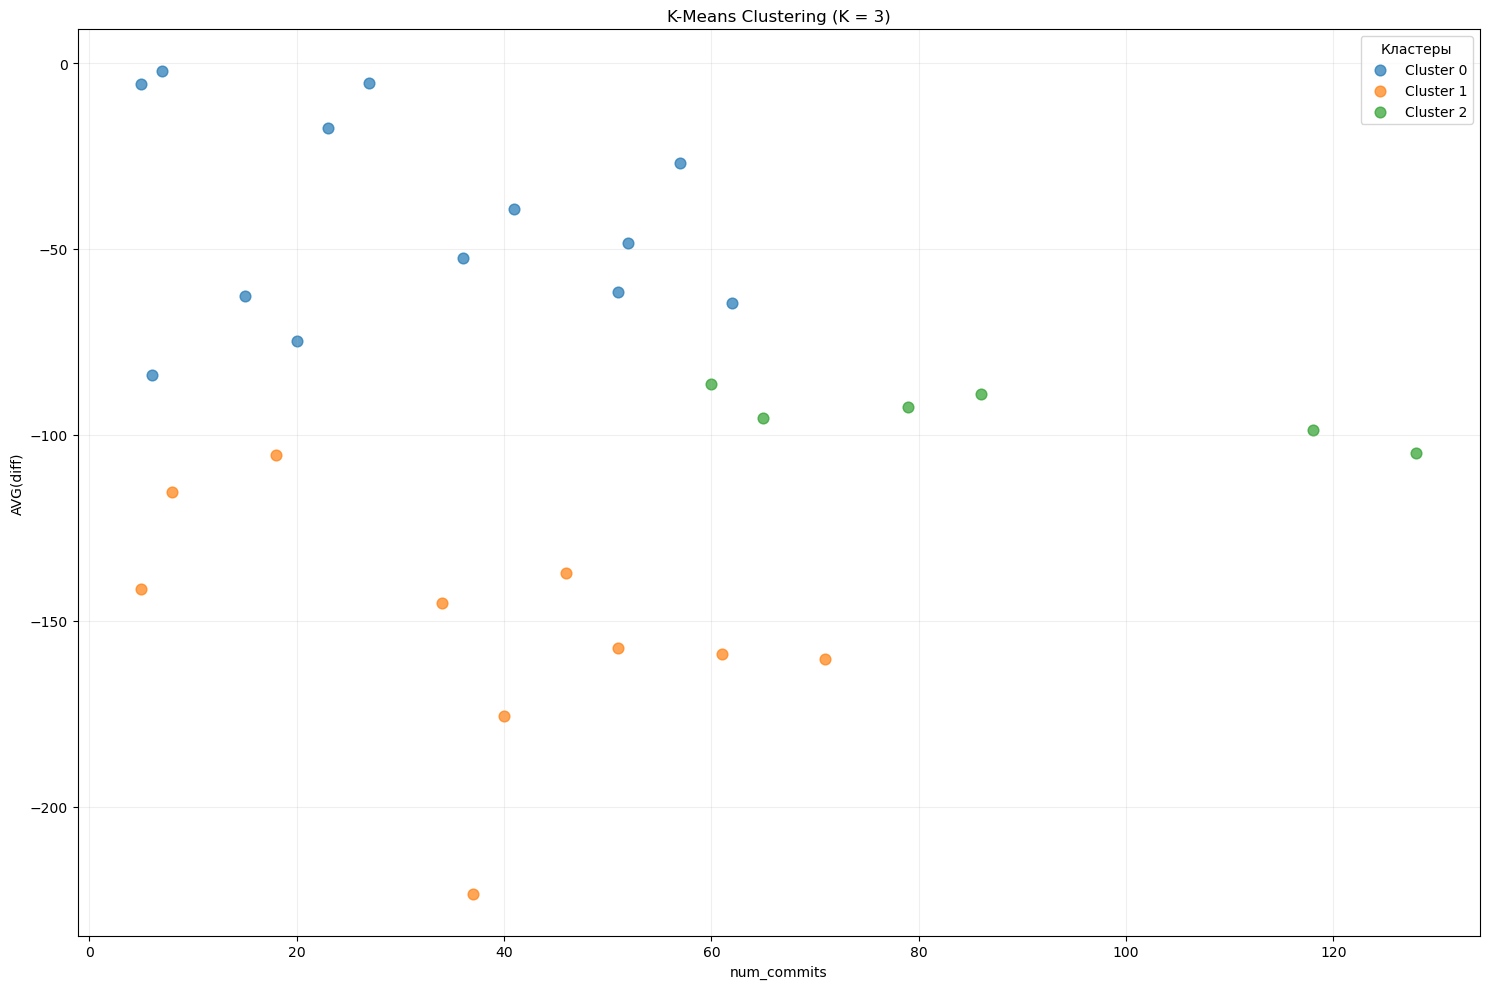

In [649]:
plot_clusters(df,'K-Means Clustering (K = 3)')

## Попробуйте разные значения `n_clusters` и посмотрите, как изменится ваша диаграмма

In [650]:
kmeans_test = KMeans(n_clusters=5, random_state=21)
kmeans_test.fit(x)
df['cluster'] = kmeans_test.labels_

c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


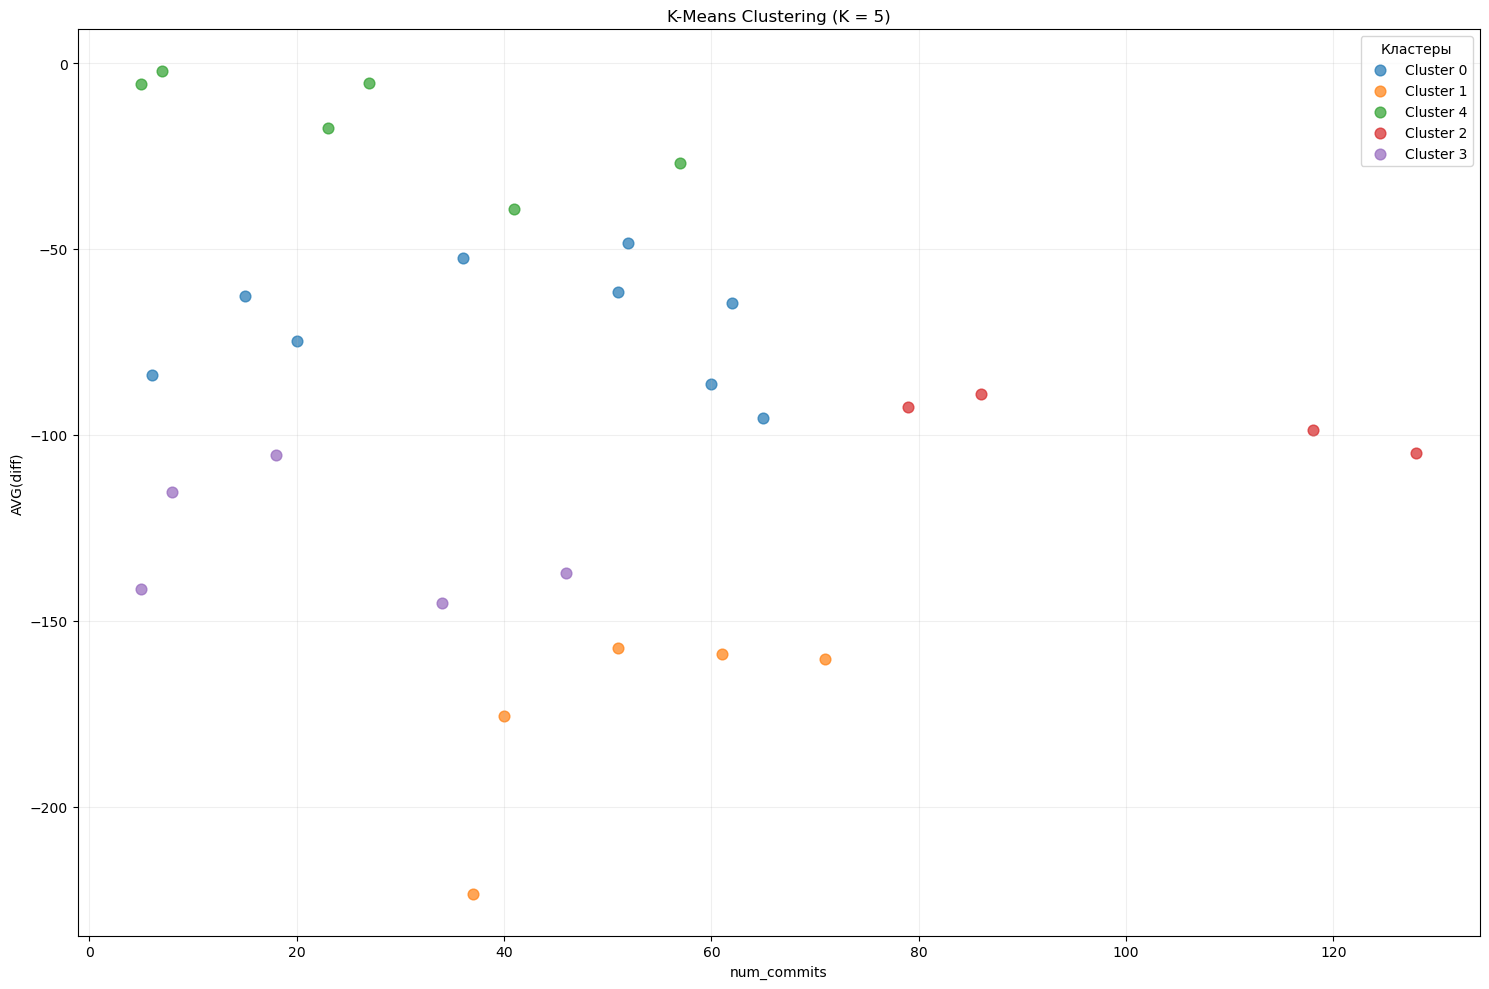

In [651]:
plot_clusters(df,'K-Means Clustering (K = 5)')

## 5. Рассчитайте `силуэт_показатель`.

Silhouette Score — это метрика, которая оценивает качество кластеризации по компактности и разделимости кластеров.
Диапазон значений: от -1 до 1 (чем ближе к 1, тем лучше).

### Интерпретация Silhouette Score

- **> 0.7** - Четкие, хорошо разделенные кластеры
- **0.5–0.7** - Умеренное разделение кластеров
- **< 0.5** - Слабая кластеризация (кластеры пересекаются)
- **≈ 0** - Кластеры значительно перекрываются
- **< 0** - Точки назначены неверно (ошибка кластеризации)

In [652]:
score = silhouette_score(x, df['cluster'])
print(f"Silhouette Score для K=3: {score}")

Silhouette Score для K=3: 0.3521030626149593


## 3. DBSCAN

1. Ознакомьтесь с документацией о том, как работает этот алгоритм.
2. Используйте этот алгоритм для создания кластеров с параметрами `eps=20` и `min_samples=2`.
3. Визуализируйте данные с помощью `scatter plot`.
4. Попробуйте разные значения параметров `eps` и `min_samples` и посмотрите, как изменится ваша диаграмма.
5. Рассчитайте `silhouette_score` (см. документацию по этой метрике).

DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN — это алгоритм кластеризации, основанный на плотности данных. В отличие от K-Means, который работает с выпуклыми кластерами, DBSCAN:
- Находит кластеры произвольной формы.
- Автоматически определяет число кластеров.
- Помечает выбросы (шумовые точки).

In [653]:
dbscan = DBSCAN(eps=20, min_samples=2)
df['cluster'] = dbscan.fit_predict(x)

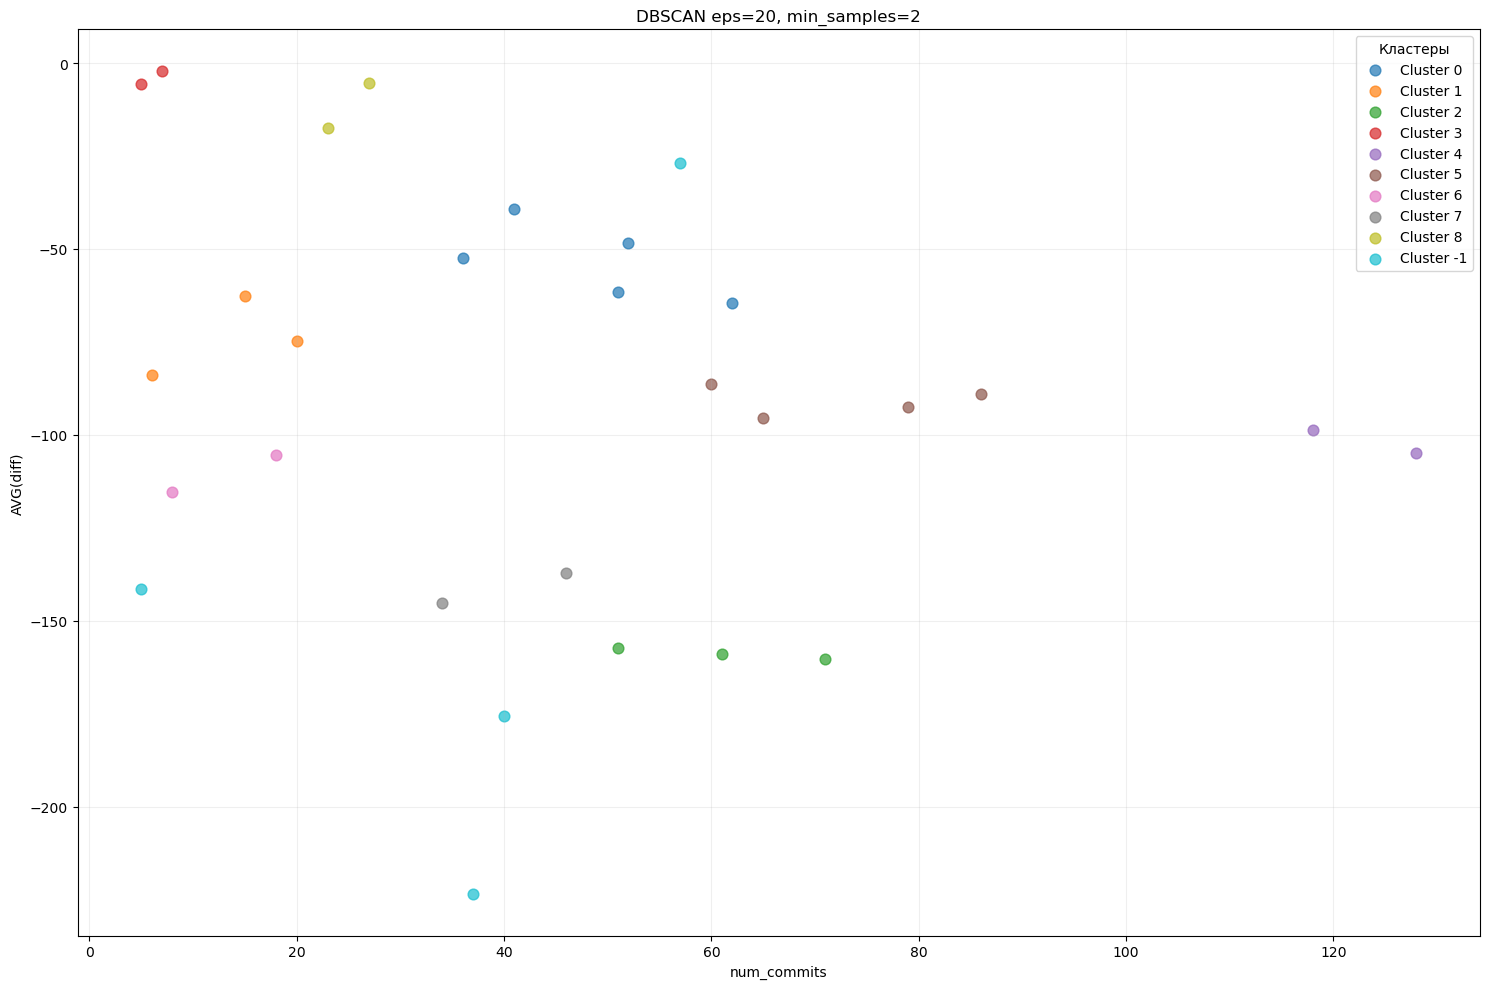

In [654]:
plot_clusters(df,'DBSCAN eps=20, min_samples=2')

В DBSCAN метка -1 присваивается шумовым точкам (outliers), которые:
- Не попали ни в один кластер
- Находятся в областях с недостаточной плотностью (менее min_samples точек в радиусе eps)

Это нормальное и ожидаемое поведение алгоритма, одна из его ключевых особенностей

In [655]:
dbscan_test = DBSCAN(eps=30, min_samples=4)
df['cluster'] = dbscan_test.fit_predict(x)

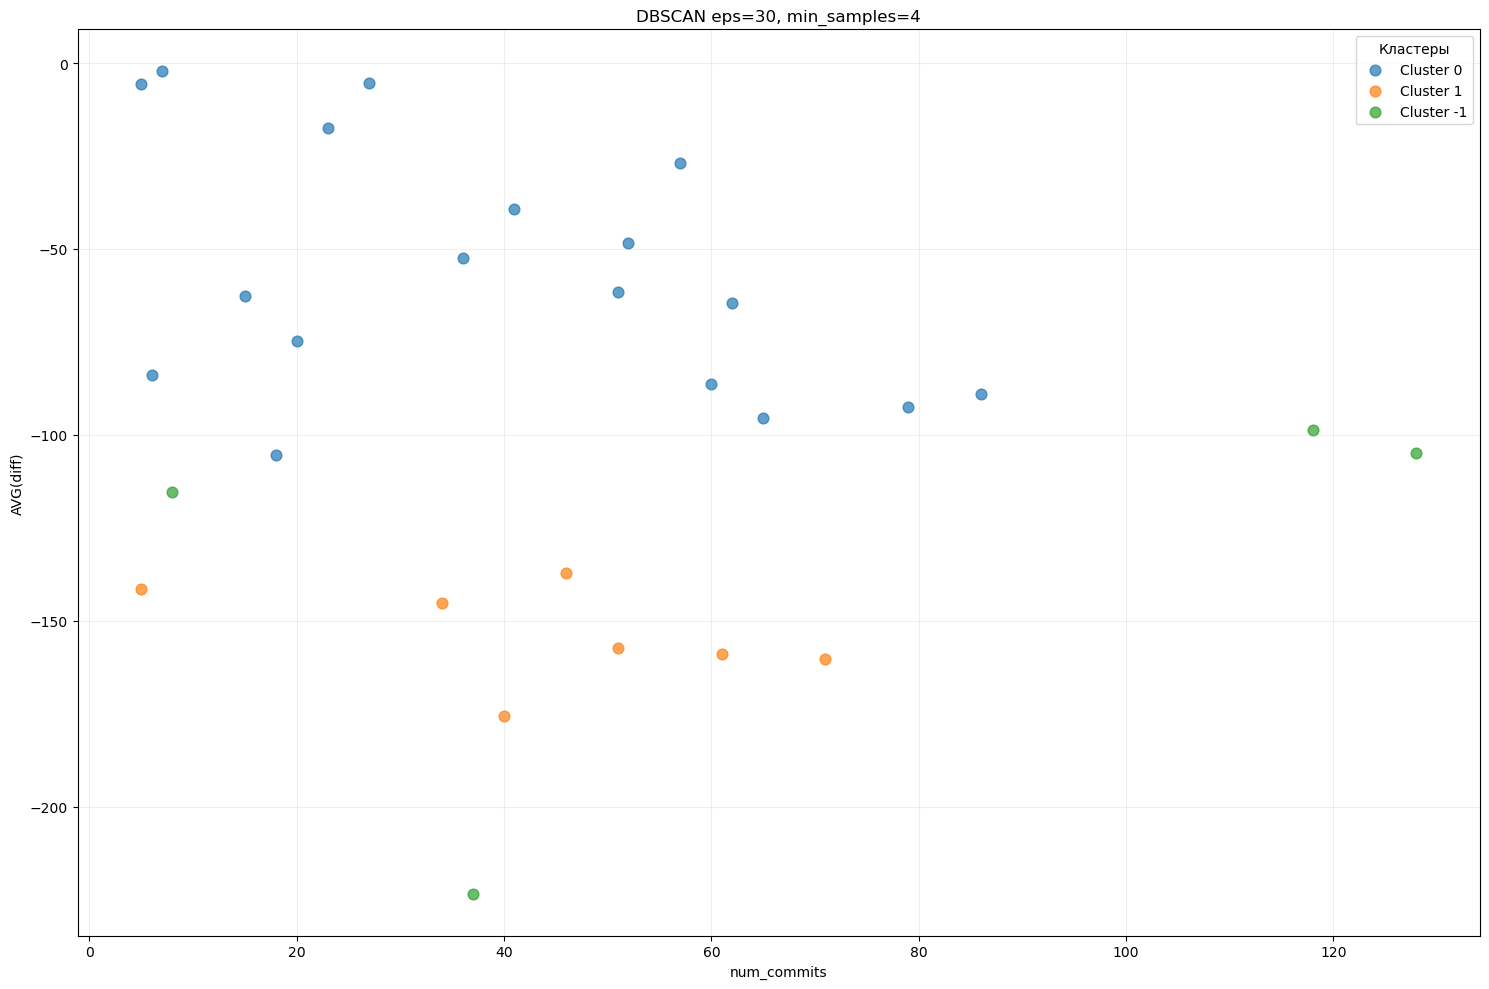

In [656]:
plot_clusters(df,'DBSCAN eps=30, min_samples=4')

## Рассчитайте `silhouette_score`

- Шум (-1) исключается из расчёта, так как метрика требует ≥ 2 кластеров.
- Метрика считается только для точек, принадлежащих кластерам (метки ≥ 0)

In [657]:
valid_mask = df['cluster'] != -1
x_valid = x[valid_mask]
labels_valid = df.loc[valid_mask, 'cluster']

if len(set(labels_valid)) > 1:
    score = silhouette_score(x_valid, labels_valid)
    print(f"Silhouette Score (без шума): {score}")
else:
    print("Недостаточно кластеров для расчёта (все точки - шум или один кластер)")

Silhouette Score (без шума): 0.5021703956745475


## 4. Hierarchical (AgglomerativeClustering)
### Иерархическая (агломеративная) кластеризация

1. Используйте этот алгоритм для создания кластеров с параметром `n_clusters=5`.
2. Визуализируйте данные на `scatter plot`.
3. Попробуйте разные значения параметра `n_clusters` и посмотрите, как изменится график.
4. Рассчитайте `silhouette_score`.
5. Визуализируйте `dendrogram`.

Иерархическая (агломеративная) кластеризация — это метод кластеризации, который строит иерархию кластеров, объединяя наиболее похожие объекты или группы объектов на каждом шаге.

In [658]:
agg = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['cluster'] = agg.fit_predict(x)

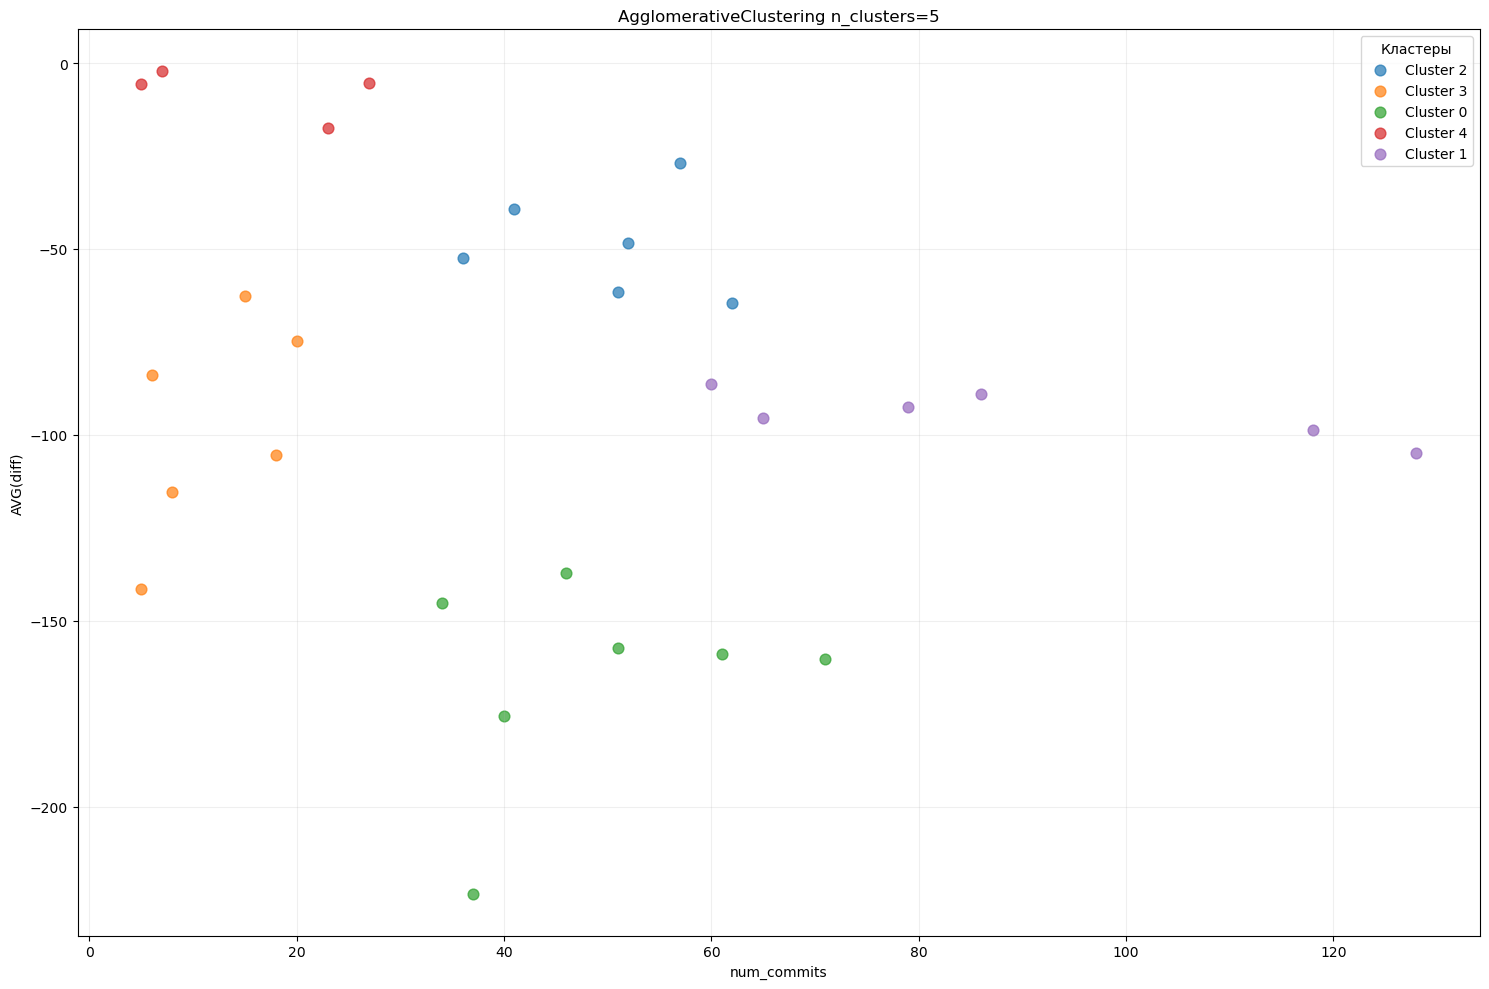

In [659]:
plot_clusters(df,'AgglomerativeClustering n_clusters=5')

In [660]:
agg_test = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
df['cluster'] = agg_test.fit_predict(x)

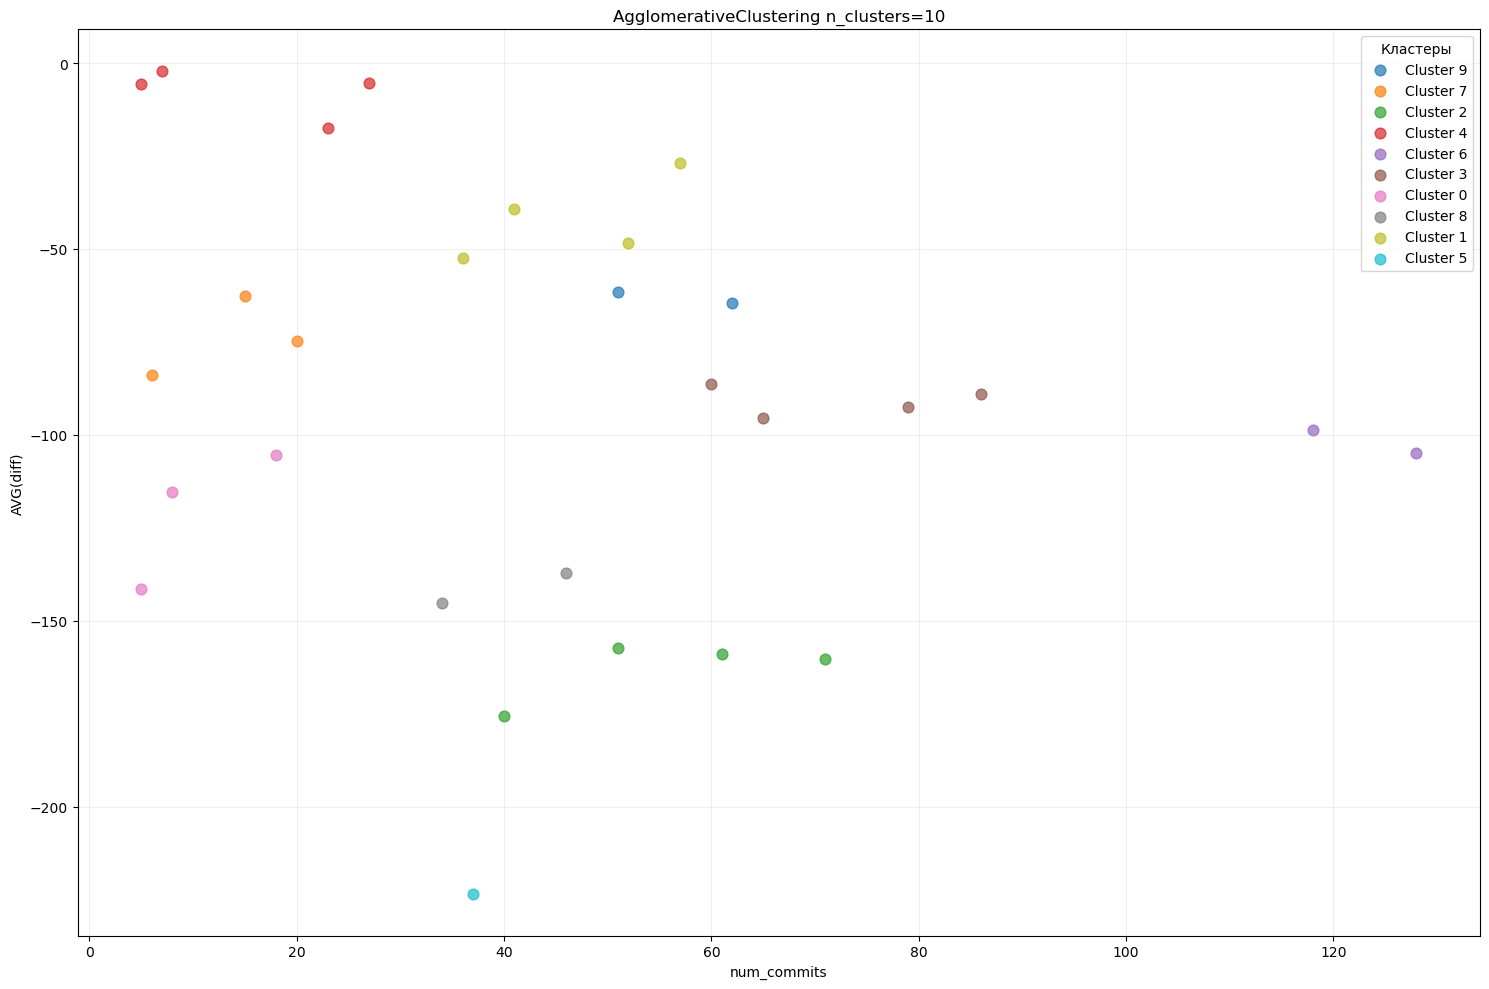

In [661]:
plot_clusters(df,'AgglomerativeClustering n_clusters=10')

In [662]:
score = silhouette_score(x, df['cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.431193930539333


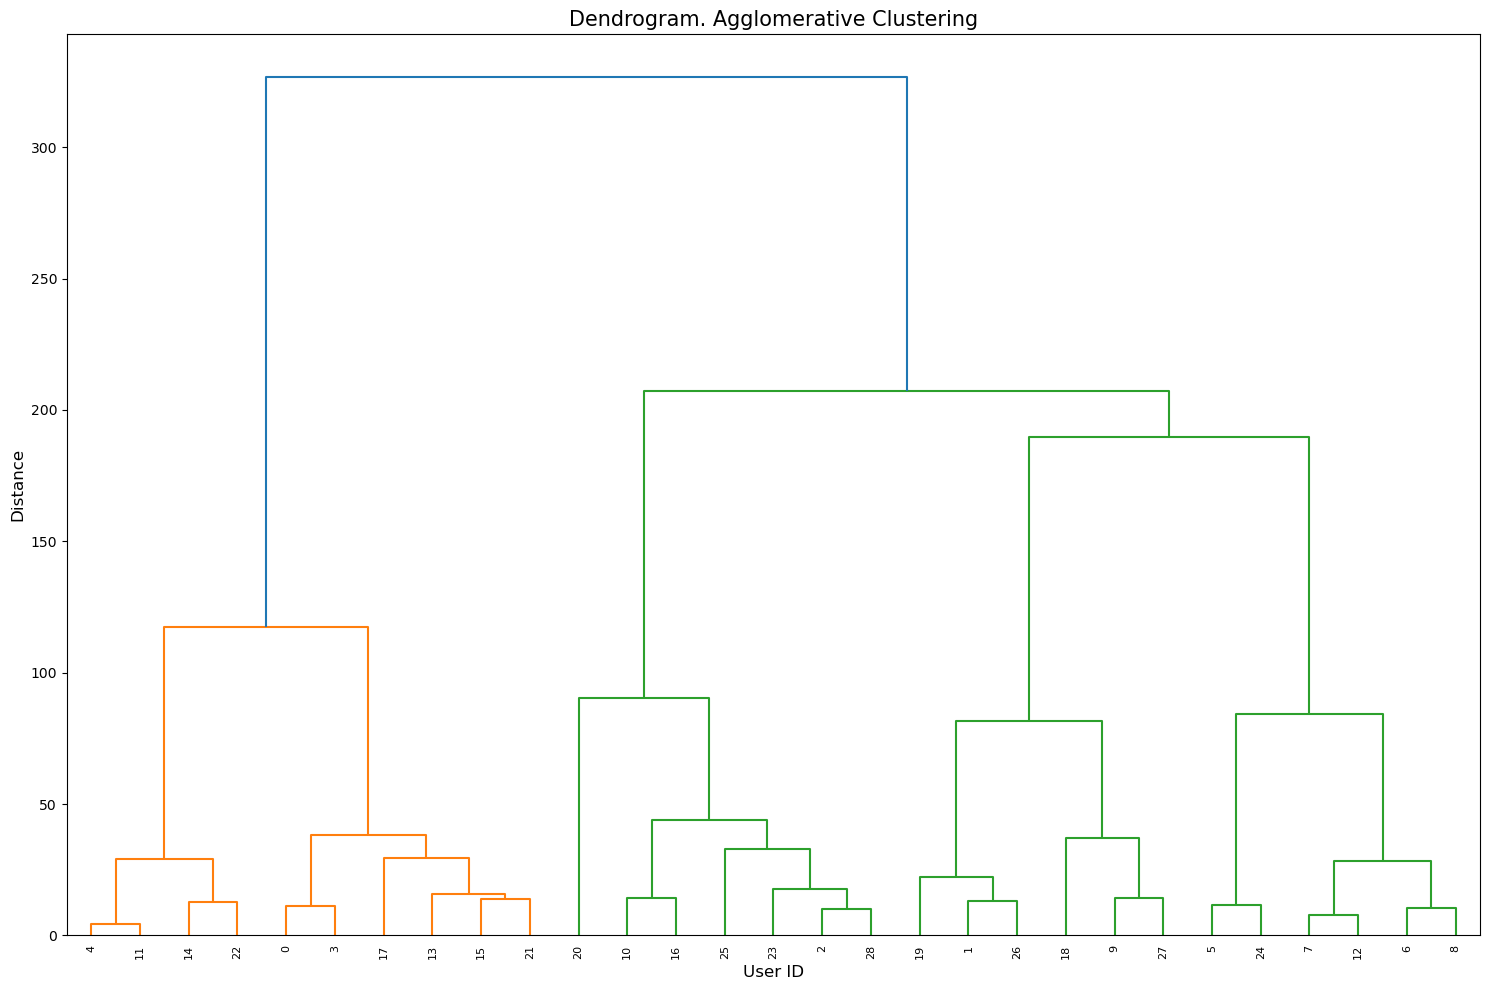

In [663]:
plt.figure(figsize=(15, 10))
linkage = linkage(x, method='ward')
dendrogram(linkage, truncate_mode='lastp', p=30, show_leaf_counts=True, leaf_rotation=90, leaf_font_size=8, show_contracted=True)
plt.title('Dendrogram. Agglomerative Clustering', fontsize=15)
plt.xlabel('User ID', fontsize=12)
plt.ylabel('Distance', fontsize=12) 
plt.tight_layout()
plt.show()

## Интерпретация дендрограммы

### Основные элементы:
1. **Вертикальные линии**  
   Показывают процесс объединения кластеров

2. **Высота линии**  
   - Отражает расстояние между объединяемыми кластерами  
   - Чем выше линия — тем менее похожи кластеры  

3. **Выбор числа кластеров**  
   Оптимальное количество определяется по:  
   - Наибольшим вертикальным промежуткам  
   - Резким скачкам расстояния между объединениями

## 5. Function

Напишите функцию, которая: 
 1. Принимает в качестве аргументов: класс модели для кластеризации, его параметры, имя параметра для оптимизации, диапазон значений параметра для проверки. 
 2. Пробует различные значения из заданного диапазона параметров и вычисляет `silhouette_score` для каждого значения из диапазона. 
 3. Находит наилучшее значение параметра в диапазоне. 
 4. Возвращает два подграфика: 


- - на первом графике показано, как меняется показатель `silhouette_score` в зависимости от значения параметра,
- - на втором графике данные визуализированы с помощью `scatter plot` и модели кластеризации с оптимальным значением параметра.

In [664]:
def optimize_clustering(
    model_class, 
    X: pd.DataFrame, 
    param_name: str, 
    param_range: Iterable, 
    **model_kwargs
) -> Optional[float]:
    
    scores = []
    best_score = -1
    best_param = None
    
    for value in param_range:
        try:
            params = {param_name: value, **model_kwargs}
            if model_class.__name__ == 'DBSCAN' and 'random_state' in params:
                del params['random_state']
                
            model = model_class(**params)
            labels = model.fit_predict(X)
            
            unique_labels = np.unique(labels[labels != -1])
            if len(unique_labels) > 1:
                score = silhouette_score(X[labels != -1], labels[labels != -1]) if -1 in labels else silhouette_score(X, labels)
                scores.append(score)
                
                if score > best_score:
                    best_score = score
                    best_param = value
            else:
                scores.append(-1)
        except:
            scores.append(-1)
    
    if best_param is None:
        print("Ошибка: не удалось найти валидные кластеры для любого значения параметра")
        return None
    

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(param_range[:len(scores)], scores, 'bo-')
    if best_param is not None:
        plt.axvline(best_param, color='r', linestyle='--')
    plt.title(f'Лучшее {param_name}={best_param}\nScore={best_score:.3f}')
    plt.xlabel(param_name)
    plt.ylabel('Silhouette Score')
    
    plt.subplot(1, 2, 2)
    if best_param is not None:
        params = {param_name: best_param, **model_kwargs}
        if model_class.__name__ == 'DBSCAN' and 'random_state' in params:
            del params['random_state']
        best_model = model_class(**params)
        labels = best_model.fit_predict(X)
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
    plt.title(f'Кластеры ({param_name}={best_param})')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    
    plt.tight_layout()
    plt.show()
    
    return best_param

c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

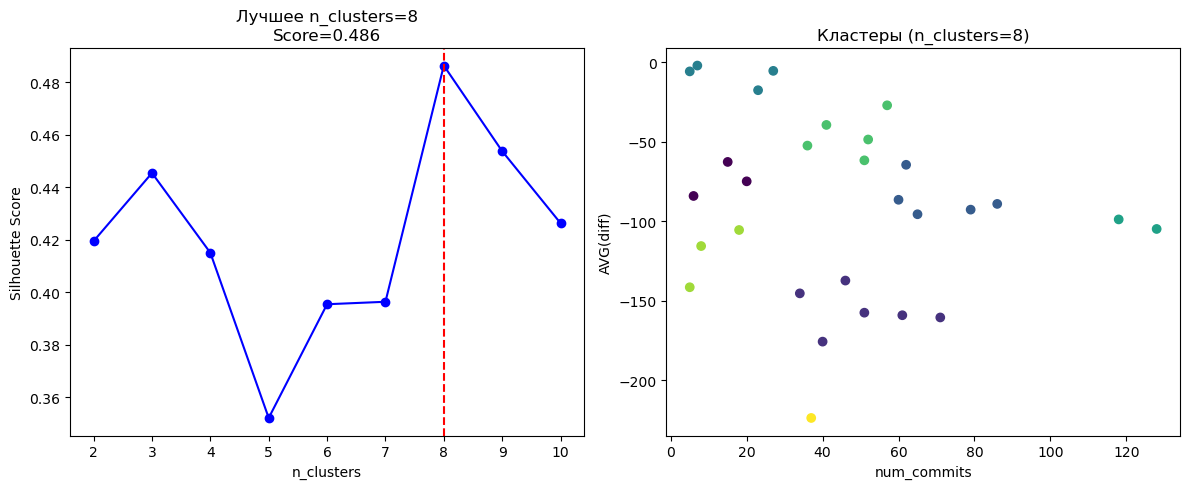

In [665]:
best_n = optimize_clustering(
    model_class=KMeans,
    X=x,
    param_name='n_clusters',
    param_range=range(2, 11),
    random_state=21
)

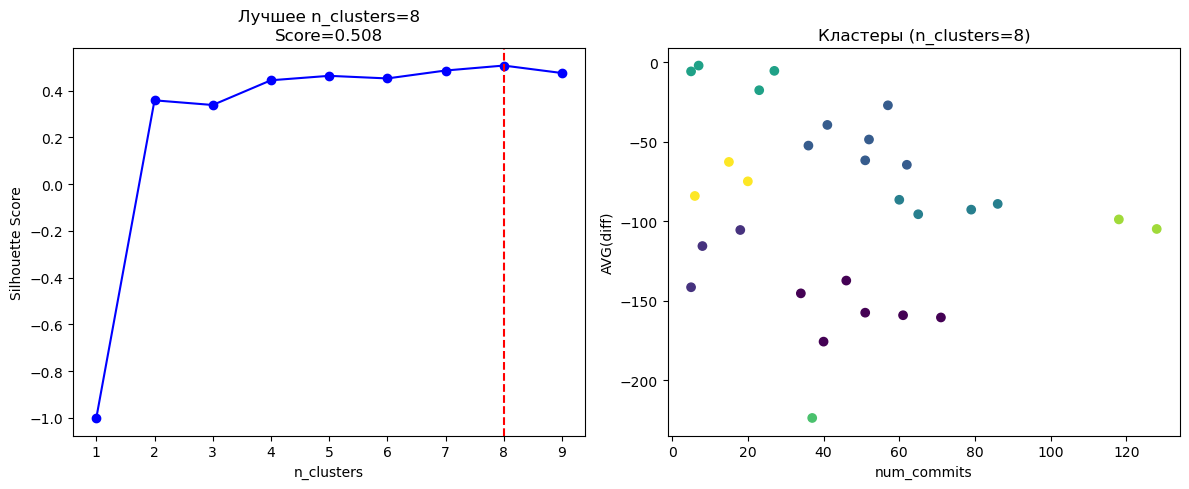

In [666]:
best_n = optimize_clustering(
    model_class=AgglomerativeClustering,
    X=x,
    param_name='n_clusters',
    param_range=range(1, 10),
    linkage='ward',
    metric='euclidean'
)

### Рассчет оптимального eps для DBSCAN

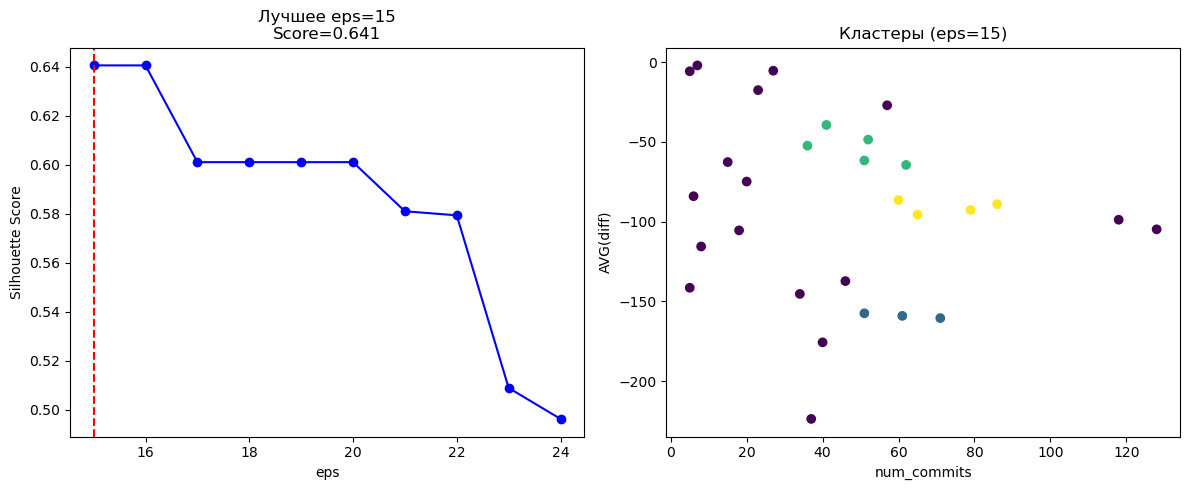

In [667]:
best_n = optimize_clustering(
    model_class=DBSCAN,
    X=x,
    param_name='eps',
    param_range=range(15,25, 1),
    min_samples=3,
    metric='euclidean',
)

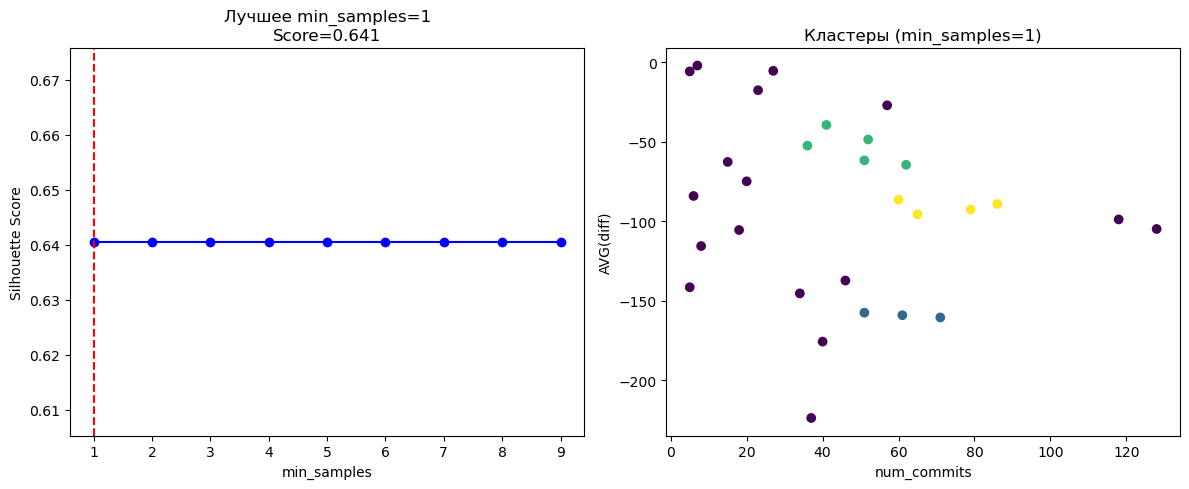

In [668]:
best_n = optimize_clustering(
    model_class=DBSCAN,
    X=x,
    param_name='min_samples',
    param_range=range(1, 10),
    min_samples=3,
    metric='euclidean',
    eps=15
)

In [ ]:
def optimize_clustering(
    model_class,          # Класс модели кластеризации (KMeans, DBSCAN и т.д.)
    X: pd.DataFrame,      # Данные для кластеризации (DataFrame)
    param_name: str,      # Название параметра для оптимизации (например 'n_clusters')
    param_range: Iterable, # Диапазон значений параметра для тестирования
    **model_kwargs        # Дополнительные параметры модели
) -> Optional[float]:     # Возвращает оптимальное значение параметра или None
    
    # Инициализация переменных для хранения результатов
    scores = []           # Список для хранения silhouette scores
    best_score = -1       # Лучший найденный score (инициализируется как -1)
    best_param = None     # Оптимальное значение параметра
    
    # Перебираем все значения параметра из заданного диапазона
    for value in param_range:
        try:
            # Формируем словарь параметров для модели
            params = {param_name: value, **model_kwargs}
            
            # Особый случай для DBSCAN - удаляем random_state, если он есть
            if model_class.__name__ == 'DBSCAN' and 'random_state' in params:
                del params['random_state']
                
            # Создаем и обучаем модель с текущими параметрами
            model = model_class(**params)
            labels = model.fit_predict(X)
            
            # Получаем уникальные метки кластеров, исключая шум (-1)
            unique_labels = np.unique(labels[labels != -1])
            
            # Проверяем, что есть хотя бы 2 кластера для вычисления score
            if len(unique_labels) > 1:
                # Вычисляем silhouette score, учитывая наличие шума
                if -1 in labels:
                    # Для данных с шумом вычисляем score только для нешумовых точек
                    score = silhouette_score(X[labels != -1], labels[labels != -1])
                else:
                    # Для данных без шума вычисляем score для всех точек
                    score = silhouette_score(X, labels)
                
                # Сохраняем полученный score
                scores.append(score)
                
                # Обновляем лучший результат, если текущий score лучше
                if score > best_score:
                    best_score = score
                    best_param = value
            else:
                # Если кластеров недостаточно, сохраняем -1
                scores.append(-1)
        except:
            # В случае ошибки также сохраняем -1
            scores.append(-1)
    
    # Проверяем, были ли найдены валидные кластеры
    if best_param is None:
        print("Ошибка: не удалось найти валидные кластеры для любого значения параметра")
        return None
    
    # Создаем график для визуализации результатов
    plt.figure(figsize=(12, 5))
    
    # Первый подграфик - зависимость score от параметра
    plt.subplot(1, 2, 1)
    # Строим график scores
    plt.plot(param_range[:len(scores)], scores, 'bo-')
    # Добавляем вертикальную линию для лучшего параметра
    if best_param is not None:
        plt.axvline(best_param, color='r', linestyle='--')
    # Настраиваем заголовок и подписи осей
    plt.title(f'Лучшее {param_name}={best_param}\nScore={best_score:.3f}')
    plt.xlabel(param_name)
    plt.ylabel('Silhouette Score')
    
    # Второй подграфик - визуализация кластеров с лучшим параметром
    plt.subplot(1, 2, 2)
    if best_param is not None:
        # Снова создаем модель с лучшими параметрами
        params = {param_name: best_param, **model_kwargs}
        if model_class.__name__ == 'DBSCAN' and 'random_state' in params:
            del params['random_state']
        best_model = model_class(**params)
        labels = best_model.fit_predict(X)
        # Визуализируем кластеры (используем первые два признака)
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
    # Настраиваем заголовок и подписи осей
    plt.title(f'Кластеры ({param_name}={best_param})')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    
    # Улучшаем расположение элементов на графике
    plt.tight_layout()
    # Показываем график
    plt.show()
    
    # Возвращаем оптимальное значение параметра
    return best_param